<a href="https://colab.research.google.com/github/juencabe/Proyecto1/blob/main/Nuevo_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Importamos libreria para trabajar con Google Colaboratory
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Cargamos la ase de datos que vamos a utilizar
df = pd.read_csv("/content/drive/MyDrive/Proyecto_Lab1/Machine_Learning_Lab1.csv",sep=";")

**ANALISIS EXPLORATORIO DE LOS DATOS**

In [5]:
#Revisamos la estructura de datos
df.head()

,id,title,userId,score,movieId
0,as1,the grand seduction,1,1.0,1
1,as2,take care good night,1,4.5,2
2,as3,secrets of deception,1,5.0,3
3,as4,pink: staying true,1,5.0,4
4,as5,monster maker,1,5.0,5


In [6]:
#Revisamos los tipos de datos de los campos que vamos a utilizar
df.dtypes

id          object
title       object
userId       int64
score      float64
movieId      int64
dtype: object

In [7]:
#Verificamos que no halla nulos en los diferentes campos
df.isna().sum()

id         0
title      0
userId     0
score      0
movieId    0
dtype: int64

In [8]:
# Visualizamos la calificación de películas por usuario

df_users = df.groupby(['userId']).count()
df_users.head()

,id,title,score,movieId
userId,,,,
1,27,27,27,27
2,22,22,22,22
3,10,10,10,10
4,59,59,59,59
5,26,26,26,26


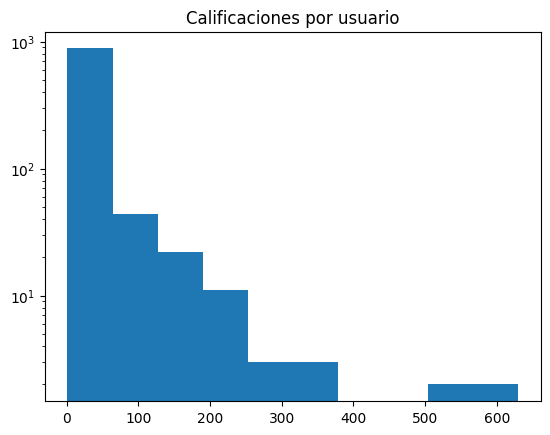

In [9]:
plt.hist(df_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

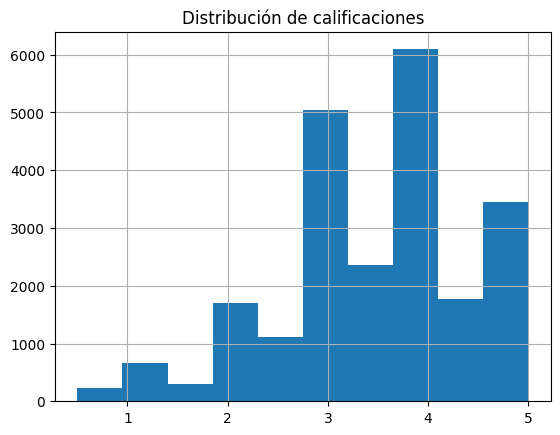

In [10]:
# Revisamos la distribución de las calificaciones

df['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

**MACHINE LEARNING**

In [11]:
# Limitamos la cantidad de registros a 10.000 para realizar el entrenamiento del modelo
df1=df.head(10000)

In [12]:
df1.shape

(10000, 5)

In [13]:
# Instalamos la libreria surprise
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195788 sha256=c6ccf51a34b167e4d664989f6145b796a7009a5ce3e21acac13a4fae90f2c31f
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [14]:
#Importamos las librerias que vamos a utilizar
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [15]:
#Creamos un ojeto reader para analizar las calificaciones del archivo
reader = Reader(rating_scale=(1,5))

In [16]:
#Cargamos los datos en el dataset de surprise
df2 = Dataset.load_from_df(df[["userId", "movieId", "score"]], reader)

In [17]:
#Realizamos la división de los datos para las pruebas
trainset, testset = train_test_split(df2, test_size=0.2, random_state=42)

In [18]:
#Utilizamos el SVD para el modelo de entrenamiento
modelo = SVD(n_factors=100, n_epochs=20, random_state=42)
modelo.fit(trainset)

In [19]:
#Realizamos la prueba con un usuario
user_id=4
item_ids=df1["movieId"].unique()
predicciones = []
for item_id in item_ids:
  prediccion = modelo.predict(user_id, item_id)
  predicciones.append((item_id, prediccion.est))

In [20]:
#Creamos la variable que vamos a utilizar en el nuevo modelo
sorted_predicciones=sorted(predicciones, key=lambda x: x[1], reverse=True)

In [23]:
#Ponemos en marcha el modelo
recomendacion_titulos = []
for predic in sorted_predicciones:
  movie_id = predic[0]
  movie_title=df1.loc[df1["movieId"]== movie_id, "title"].iloc[0]
  recomendacion_titulos.append(movie_title)
  print(recomendacion_titulos[0:5])


Se han truncado las últimas 5000 líneas del flujo de salida.
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guide to endings", 'mitti', '60 vayadu maaniram', 'gringo', 'tainted blood']
["a beginner's guid